http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_parameters_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC')
gs.fit(X, y)
results = gs.cv_results_
results

{'mean_fit_time': array([0.09738307, 0.09607897, 0.09454098, 0.09597659, 0.09343724,
        0.09406815, 0.09237208, 0.09154201, 0.09009547, 0.08980231,
        0.08953152, 0.08814359, 0.08839183, 0.08633041, 0.08630562,
        0.0854269 , 0.08756266, 0.08458261, 0.0852272 , 0.08416452,
        0.08453307, 0.08518758, 0.08660173, 0.08437595, 0.08366098,
        0.08439627, 0.08316197, 0.0851469 , 0.08268523, 0.08445764,
        0.0803503 , 0.07918005, 0.08104258, 0.08747578, 0.08571043,
        0.08394337, 0.07916136, 0.07982202, 0.07990985, 0.08066597,
        0.07750716]),
 'mean_score_time': array([0.00130563, 0.00132947, 0.00127268, 0.0013515 , 0.00142007,
        0.0014894 , 0.00139675, 0.00151877, 0.00140772, 0.00138469,
        0.00144787, 0.00150466, 0.00141573, 0.00138025, 0.0017004 ,
        0.00139194, 0.00155454, 0.0013927 , 0.0014648 , 0.00138979,
        0.00138016, 0.00136843, 0.00149364, 0.00155959, 0.00157075,
        0.00140672, 0.00134592, 0.0013598 , 0.00136104, 0.

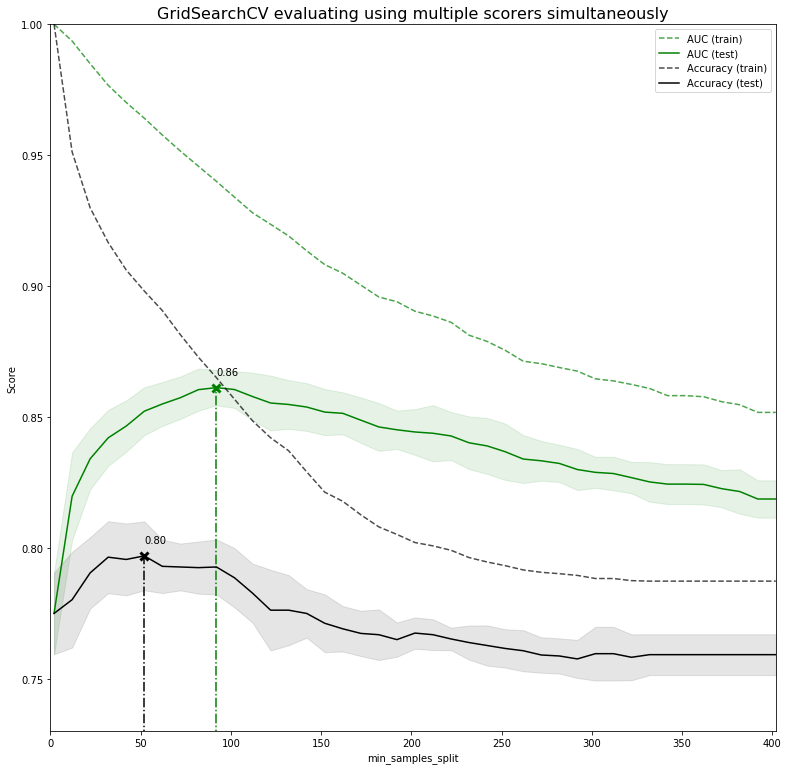

In [3]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [7]:
results['param_min_samples_split'].data

array([2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142,
       152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252, 262, 272,
       282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382, 392, 402],
      dtype=object)

In [8]:
results

{'mean_fit_time': array([0.09738307, 0.09607897, 0.09454098, 0.09597659, 0.09343724,
        0.09406815, 0.09237208, 0.09154201, 0.09009547, 0.08980231,
        0.08953152, 0.08814359, 0.08839183, 0.08633041, 0.08630562,
        0.0854269 , 0.08756266, 0.08458261, 0.0852272 , 0.08416452,
        0.08453307, 0.08518758, 0.08660173, 0.08437595, 0.08366098,
        0.08439627, 0.08316197, 0.0851469 , 0.08268523, 0.08445764,
        0.0803503 , 0.07918005, 0.08104258, 0.08747578, 0.08571043,
        0.08394337, 0.07916136, 0.07982202, 0.07990985, 0.08066597,
        0.07750716]),
 'mean_score_time': array([0.00130563, 0.00132947, 0.00127268, 0.0013515 , 0.00142007,
        0.0014894 , 0.00139675, 0.00151877, 0.00140772, 0.00138469,
        0.00144787, 0.00150466, 0.00141573, 0.00138025, 0.0017004 ,
        0.00139194, 0.00155454, 0.0013927 , 0.0014648 , 0.00138979,
        0.00138016, 0.00136843, 0.00149364, 0.00155959, 0.00157075,
        0.00140672, 0.00134592, 0.0013598 , 0.00136104, 0.